In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout
from tensorflow.keras import Sequential

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'K:/DATA SCIENCE/DataSets/Cat VS Dog/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [3]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = 'K:/DATA SCIENCE/DataSets/Cat VS Dog/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [5]:
# Normalizing the image inputs

def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [6]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2, pool_size =(2,2),padding = 'valid'))

model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2, pool_size =(2,2),padding = 'valid'))

model.add(Conv2D(128,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2, pool_size =(2,2),padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [8]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data= test_ds)

Epoch 1/10
625/625 [==============================] - 140s 201ms/step - loss: 1.8246 - accuracy: 0.5741 - val_loss: 0.7051 - val_accuracy: 0.5904
Epoch 2/10
625/625 [==============================] - 125s 196ms/step - loss: 0.6355 - accuracy: 0.6374 - val_loss: 0.5815 - val_accuracy: 0.6838
Epoch 3/10
625/625 [==============================] - 127s 202ms/step - loss: 0.5635 - accuracy: 0.7082 - val_loss: 0.5786 - val_accuracy: 0.6990
Epoch 4/10
625/625 [==============================] - 130s 208ms/step - loss: 0.5180 - accuracy: 0.7408 - val_loss: 0.5745 - val_accuracy: 0.6970
Epoch 5/10
625/625 [==============================] - 133s 213ms/step - loss: 0.4497 - accuracy: 0.7814 - val_loss: 0.4628 - val_accuracy: 0.7886
Epoch 6/10
625/625 [==============================] - 134s 215ms/step - loss: 0.3907 - accuracy: 0.8171 - val_loss: 0.4541 - val_accuracy: 0.7982
Epoch 7/10
625/625 [==============================] - 135s 216ms/step - loss: 0.3340 - accuracy: 0.8430 - val_loss: 0.5069 -

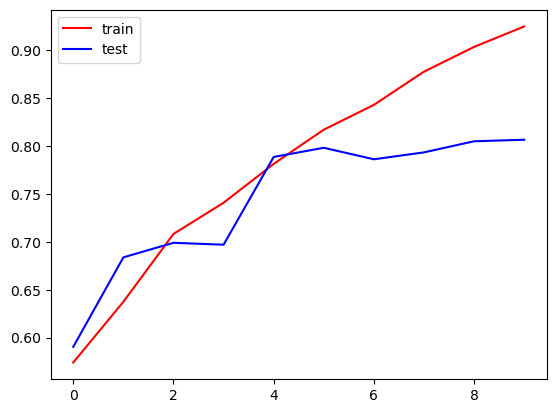

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

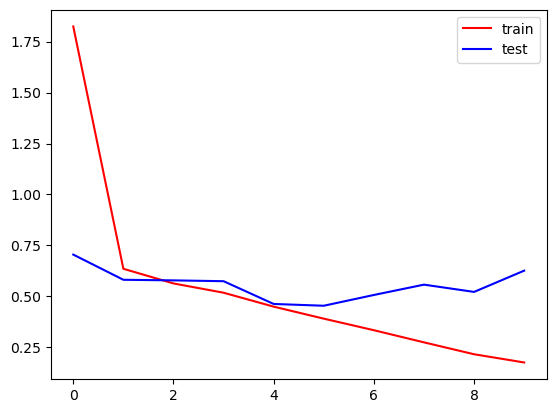

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [12]:
import cv2

In [19]:
test_image = cv2.imread("C:/Users/siddh/Downloads/Cat.jpeg")

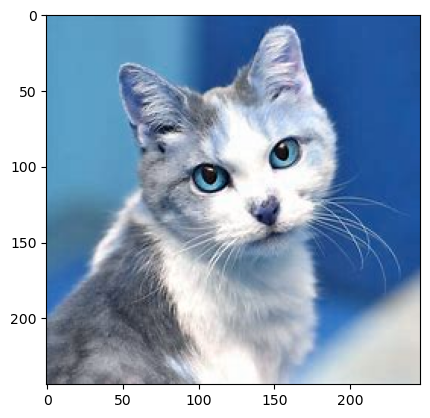

In [20]:
plt.imshow(test_image)

In [21]:
test_image.shape

(244, 247, 3)

In [22]:
test_image = cv2.resize(test_image,(256,256))

In [23]:
test_input = test_image.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

array([[0.]], dtype=float32)

In [26]:
test_image1 = cv2.imread("C:/Users/siddh/Downloads/dog.jpeg")

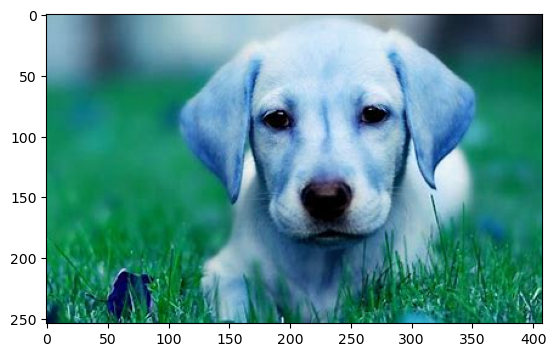

In [27]:
plt.imshow(test_image1)

In [28]:
test_image1.shape

(254, 408, 3)

In [29]:
test_image1 = cv2.resize(test_image1,(256,256))

In [30]:
test_input1 = test_image1.reshape((1,256,256,3))

In [31]:
model.predict(test_input1)

array([[1.]], dtype=float32)